In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [16]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state (Geographic Area)

In [17]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [18]:
pr["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [7]:
pr["City"].nunique()

24255

In [8]:
pr["Geographic Area"].nunique()

51

In [9]:
pr["City"].nunique()

24255

In [10]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
84.9       1
87.1       1
83         1
76.6       1
80.7       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [19]:
pr.poverty_rate.replace("-", 0, inplace=True)

In [12]:
pr.poverty_rate.value_counts()

0       1464
0        201
7.4      129
6.7      129
10.9     128
        ... 
71.8       1
66.3       1
70         1
98.6       1
44.5       1
Name: poverty_rate, Length: 771, dtype: int64

In [20]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [21]:
pr.poverty_rate=pr.poverty_rate.astype(float)

In [15]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [16]:
pr.poverty_rate.value_counts()

0.0     1665
6.7      129
7.4      129
10.9     128
10.0     128
        ... 
71.1       1
83.6       1
69.2       1
88.0       1
92.0       1
Name: poverty_rate, Length: 770, dtype: int64

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [19]:
pr.describe()

,poverty_rate
count,29329.000000
mean,16.331259
std,13.202495
min,0.000000
25%,7.000000
50%,13.600000
75%,22.400000
max,100.000000


In [23]:
pr.groupby("Geographic Area").poverty_rate.mean().head(10)

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
CO    13.187773
CT     9.137500
DC    18.000000
DE    12.555844
FL    17.508606
Name: poverty_rate, dtype: float64

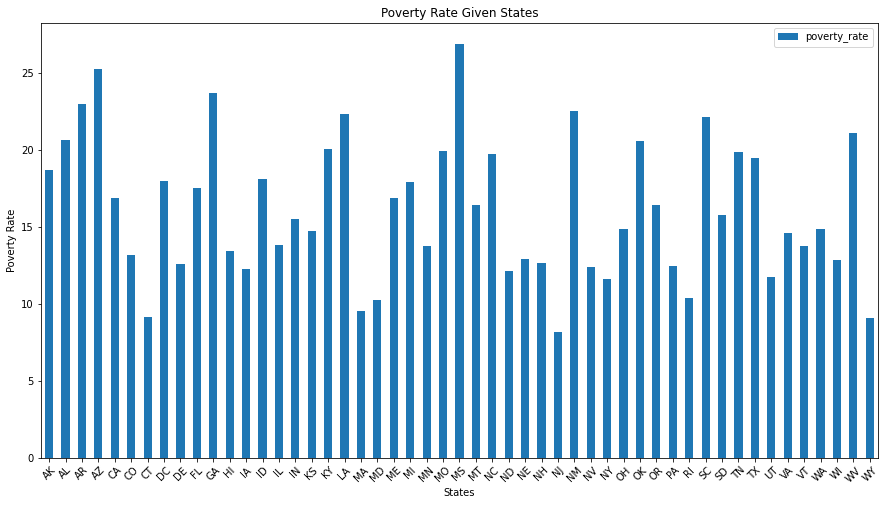

In [21]:
ax=pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(rot=45,figsize=(15,8))
ax.set_ylabel("Poverty Rate")
ax.set_xlabel("States")
ax.set_title("Poverty Rate Given States")
ax.legend();

In [22]:
pr_pov = list(pr['poverty_rate'])
pr_ga = list(pr['Geographic Area'])

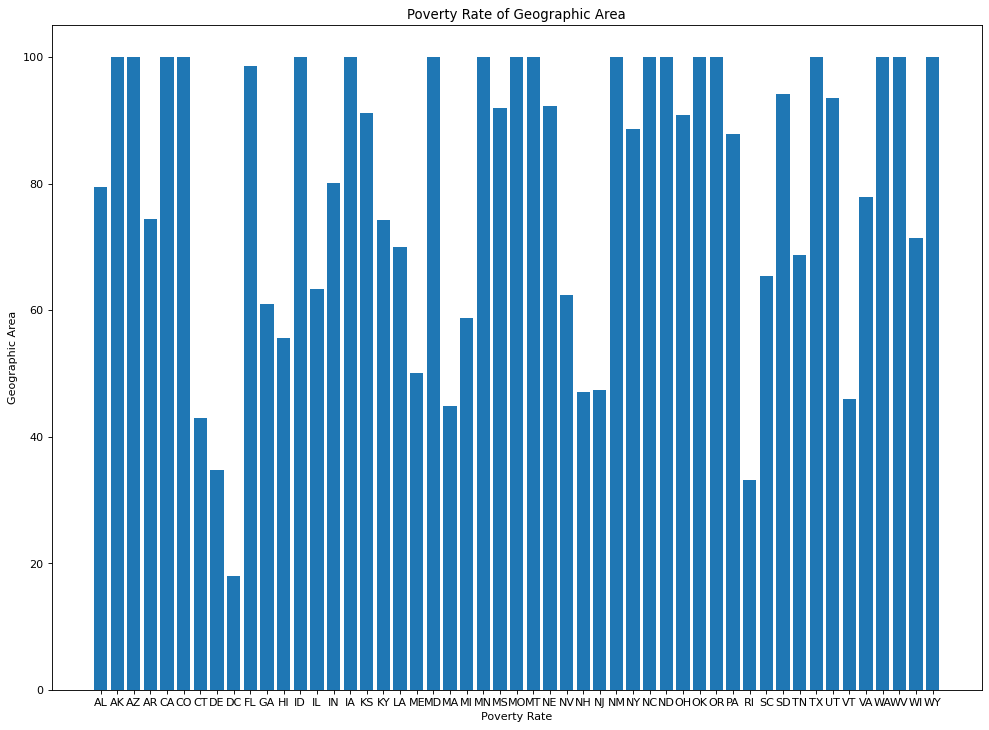

In [24]:
figure(figsize=(15, 11), dpi=80)
plt.bar(pr_ga, pr_pov)
plt.xlabel('Poverty Rate')
plt.ylabel('Geographic Area')
plt.title('Poverty Rate of Geographic Area')
plt.show();

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

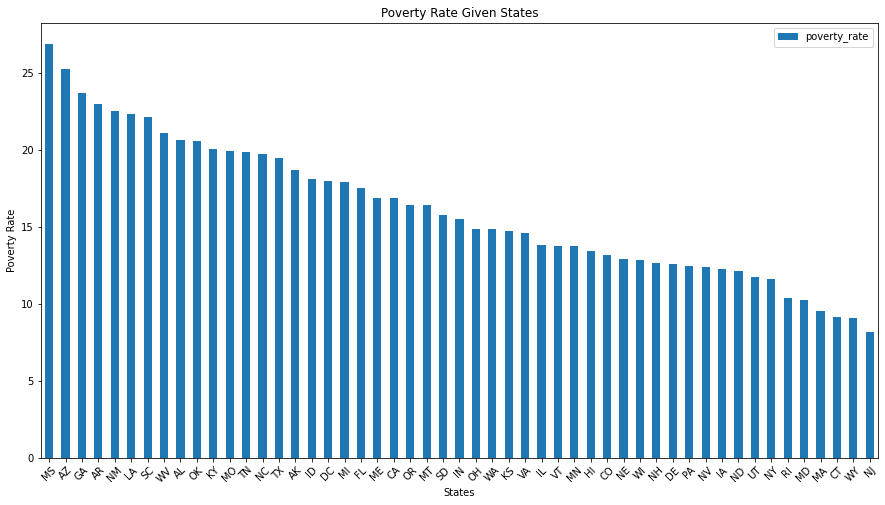

In [24]:
ax=pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).plot.bar(rot=45,figsize=(15,8))
ax.set_ylabel("Poverty Rate")
ax.set_xlabel("States")
ax.set_title("Poverty Rate Given States")
ax.legend();

**INSTRUCTION-3.b : Plot Sorted Values With Seaborn and set a green horizontal line on 20** 

In [25]:
labels=pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).index
x=np.arange(len(labels))

In [26]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

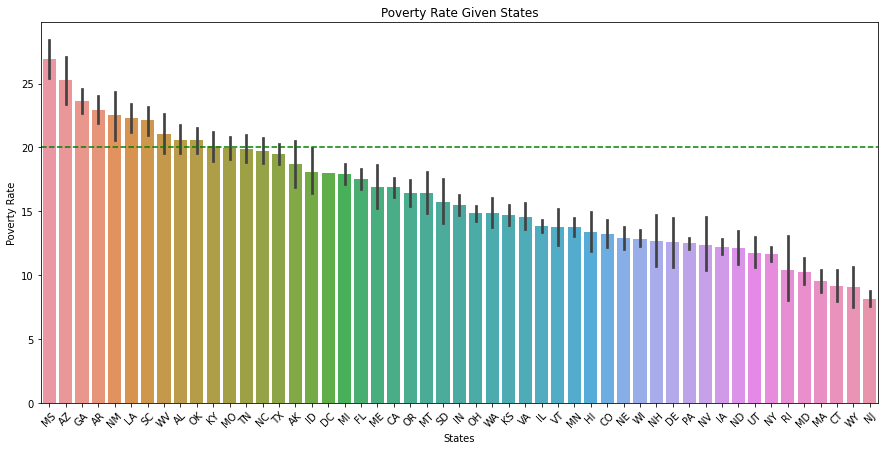

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="Geographic Area", y="poverty_rate", order=labels, data=pr)
ax.set_ylabel("Poverty Rate")
ax.set_xlabel("States")
ax.set_title("Poverty Rate Given States")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.axhline(y=20, color="green", ls="--");

## 2. Most common 15 Name or Surname of killed people 

In [28]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [29]:
kill.shape

(2535, 14)

In [30]:
kill.name.value_counts()

TK TK                49
Michael Johnson       2
Michael Brown         2
Eric Harris           2
TK Tk                 2
                     ..
Jeffory Ray Tevis     1
Sergey Makarenko      1
Richard Grimes        1
Shawn Hall            1
David  Winesett       1
Name: name, Length: 2481, dtype: int64

In [31]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [32]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

In [33]:
pairs.shape

(2486,)

In [34]:
pairs[0]

['Tim', 'Elliot']

In [35]:
pairs[0][0]

'Tim'

In [36]:
table=[]
for i in pairs:
    for j in i:
        table.append(j)

In [37]:
len(table)

5904

In [38]:
most_common_names=Counter(table)

In [39]:
most_common_names=most_common_names.most_common(15)

In [40]:
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [41]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,38


In [42]:
labels=df.name_or_surname_most_frequency
x = np.arange(len(labels))

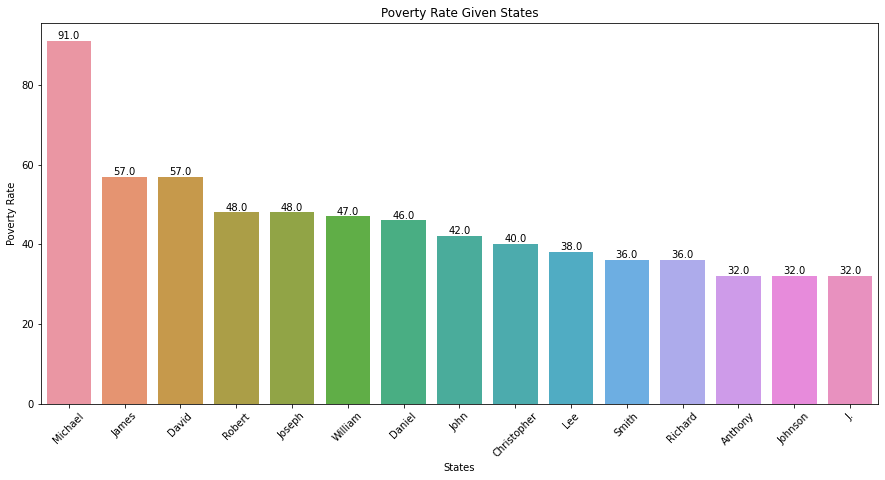

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="name_or_surname_most_frequency", y="frequency", data=df)
ax.set_ylabel("Poverty Rate")
ax.set_xlabel("States")
ax.set_title("Poverty Rate Given States")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

## 3. Killed People According to Races (Pie Chart)

In [44]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [45]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [46]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [47]:
kill.dropna(inplace=True)

In [48]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [49]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [50]:
labels=kill.race.value_counts().index

In [51]:
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [52]:
sizes=kill.race.value_counts().values

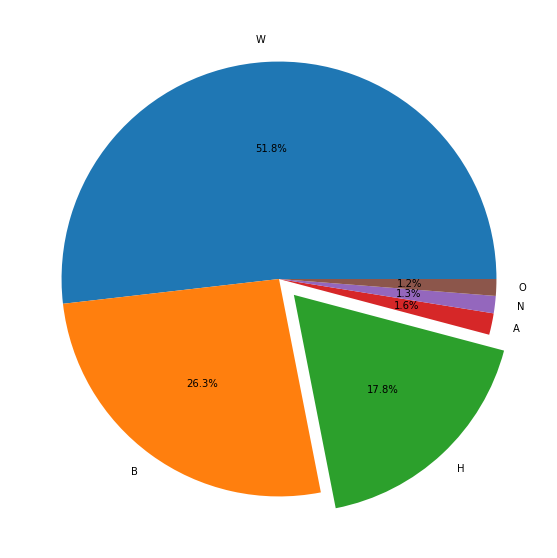

In [53]:
labels = labels
sizes = sizes
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0);

## 4a.Box plot of age in both genders separeted by manner of death.

In [54]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [55]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

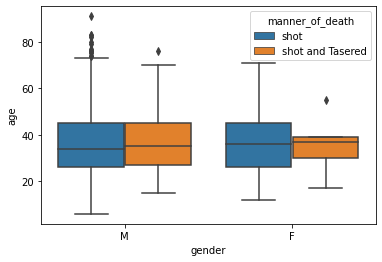

In [56]:
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=kill);

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

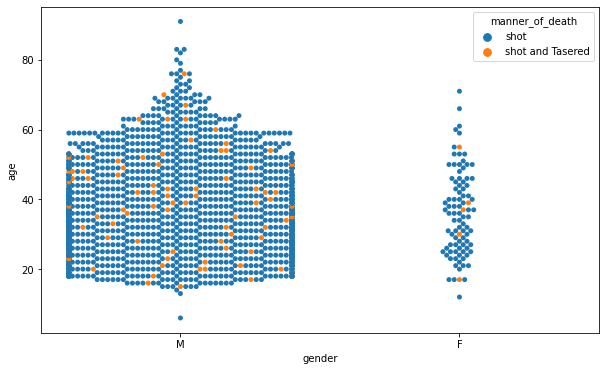

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="gender", y="age", hue = "manner_of_death", data=kill);

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

In [58]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


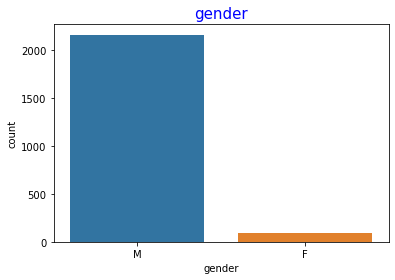

In [59]:
fig, ax = plt.subplots()
sns.countplot(x="gender", data=kill)
ax.set_title("gender", color="blue", fontsize=15);

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [60]:
kill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'metal rake', 'baton', 'crowbar',
       'oar', 'machete and gun', 'air conditioner', 'pole and knife',
       'beer bottle', 'pipe', 'baseba

In [61]:
cc=kill.armed.value_counts()[:7].index
dd=kill.armed.value_counts()[:7].values

In [62]:
cc

Index(['gun', 'knife', 'unarmed', 'vehicle', 'toy weapon', 'undetermined',
       'machete'],
      dtype='object')

In [63]:
dd

array([1247,  324,  165,  158,  102,   92,   16], dtype=int64)

In [64]:
labels=list(cc)
x=np.arange(len(labels))

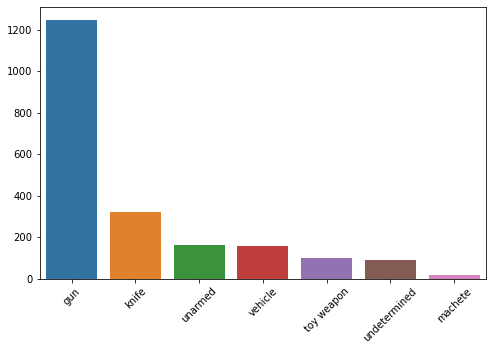

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(cc,dd)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45);

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [66]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [67]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >25 else "below25")

In [68]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


<AxesSubplot:xlabel='age_cat', ylabel='count'>

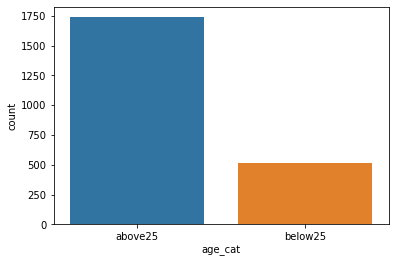

In [69]:
sns.countplot(x="age_cat", data=kill)

**INSTRUCTION-4: Plot number of killed poeple by race**

Text(0.5, 1.0, 'Race of killed people')

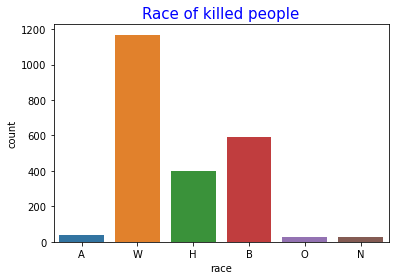

In [70]:
fig, ax = plt.subplots()
sns.countplot(x="race", data=kill)
ax.set_title('Race of killed people',color = 'blue',fontsize=15)

<AxesSubplot:xlabel='race', ylabel='count'>

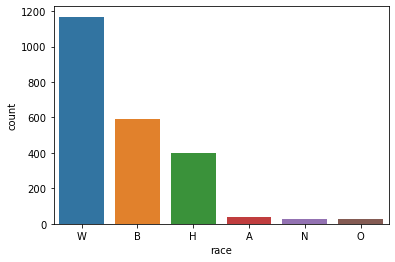

In [71]:
sns.countplot(kill.race, order=kill.groupby("race").race.count().sort_values(ascending=False).index)

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [72]:
ee=kill.city.value_counts()[:12].index
ff=kill.city.value_counts()[:12].values
labels=list(ee.values)
ticks=np.arange(len(labels))

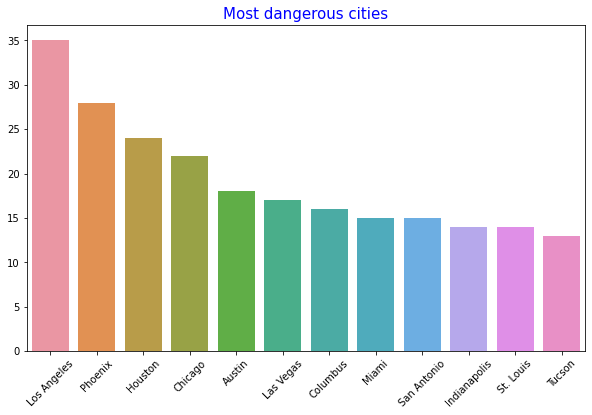

In [73]:
fig, ax =plt.subplots(figsize=(10,6))
sns.barplot(ee,ff)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

**INSTRUCTION-6: Plot 20 most dangerous states**

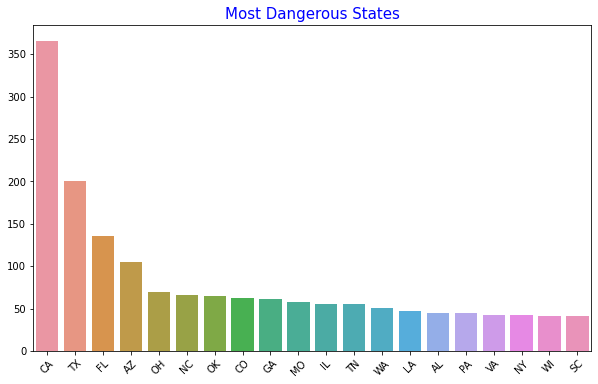

In [74]:
gg=kill.state.value_counts()[:20].index
hh=kill.state.value_counts()[:20].values
plt.figure(figsize=(10,6))
sns.barplot(gg,hh)
plt.xticks(rotation=45)
plt.title('Most Dangerous States',color = 'blue',fontsize=15);

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

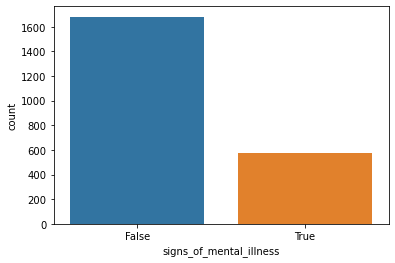

In [75]:
sns.countplot(kill.signs_of_mental_illness)

**INSTRUCTION-8: Plot number of Threat Types**

<AxesSubplot:xlabel='threat_level', ylabel='count'>

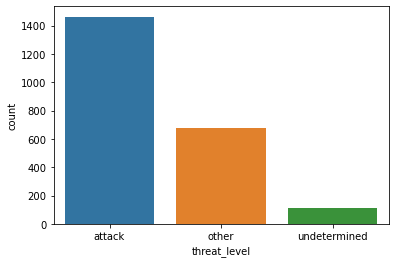

In [76]:
sns.countplot(kill.threat_level)

**INSTRUCTION-9: Plot number of Flee Types**

<AxesSubplot:xlabel='flee', ylabel='count'>

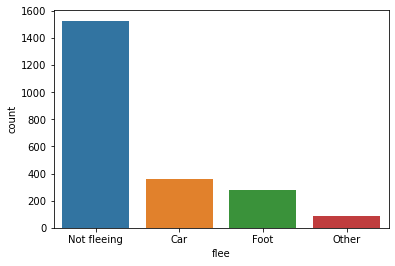

In [77]:
sns.countplot(kill.flee)